In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Data_Train.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
print("Number of Rows:--",df.shape[0])
print("Number of Columns:--",df.shape[1])

Number of Rows:-- 10683
Number of Columns:-- 11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey,format = '%d/%m/%Y').dt.day
df['Journey_month'] = pd.to_datetime(df.Date_of_Journey,format = '%d/%m/%Y').dt.month
df.drop("Date_of_Journey",axis=1,inplace=True)

# 2 - Feature Engineering on Duration Columns

In [10]:
df['Duration'] = df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

df['Duration'] = pd.to_numeric(df['Duration'])

In [11]:
# Just to understand this we do this code
s1 = '2h 20m'
eval(s1.replace('h','*60').replace(' ','+').replace('m','*1'))

140

# 3 - Feature Engineering on Dep_Time Column

In [12]:
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour

df['Dep_Min'] = pd.to_datetime(df['Dep_Time']).dt.minute

df.drop('Dep_Time',axis=1,inplace=True)

# 4 - Feature Engineering on 'Arrival_Time' Column

In [13]:
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour

df['Arrival_Min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

df.drop('Arrival_Time',axis=1,inplace=True)

## Seperate Numerical & Categorical Data

In [14]:
Numerical = df.select_dtypes(exclude='object')
Categorical = df.select_dtypes(include='object')

In [15]:
for i in Categorical:
    print('Unique value counts of ' , i , 'Enlisted as Below Table :--')
    print('^'*60)
    print(df[i].value_counts())
    print("*"*100)

Unique value counts of  Airline Enlisted as Below Table :--
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
****************************************************************************************************
Unique value counts of  Source Enlisted as Below Table :--
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64
**

## Replace 2 names to 1 name

In [16]:
df['Destination'] = df['Destination'].replace('New Delhi','Delhi')
df['Additional_Info'] = df['Additional_Info'].replace('No info','No Info')

## Data Integrity Check

In [17]:
# Finding Duplicate values
df.duplicated().sum()

222

In [18]:
df.duplicated().max()

True

In [19]:
df.drop_duplicates(keep = 'last' , inplace = True)

In [20]:
df.shape

(10461, 14)

In [21]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Journey_Day        0
Journey_month      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

# Treate Null Value 

In [22]:
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [23]:
df['Route'] = df['Route'].fillna(df['Route'].mode()[0])

In [24]:
df.isna().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_month      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

# EDA

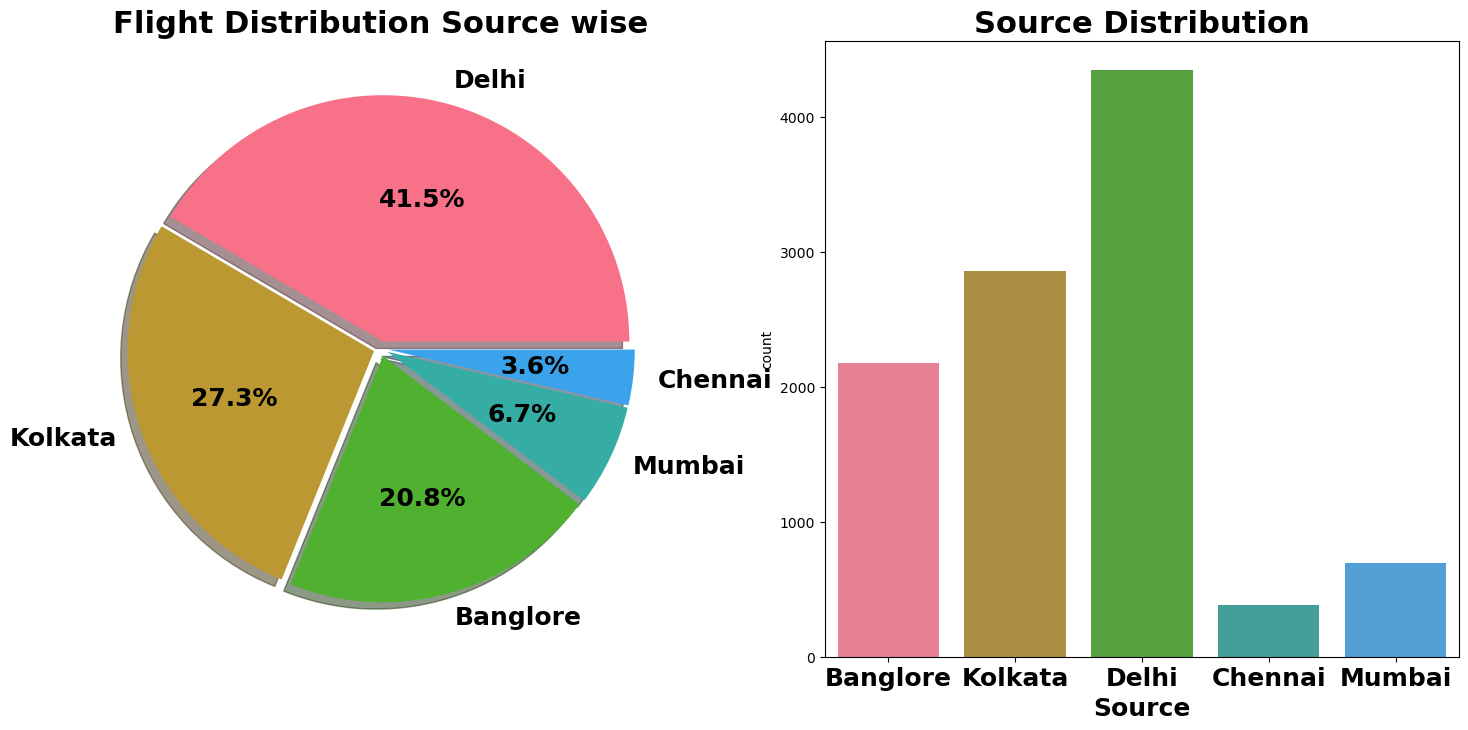

In [25]:
#plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Source'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Flight Distribution Source wise', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Source',data=df,ax=ax[1])
ax[1].set_title('Source Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Source",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

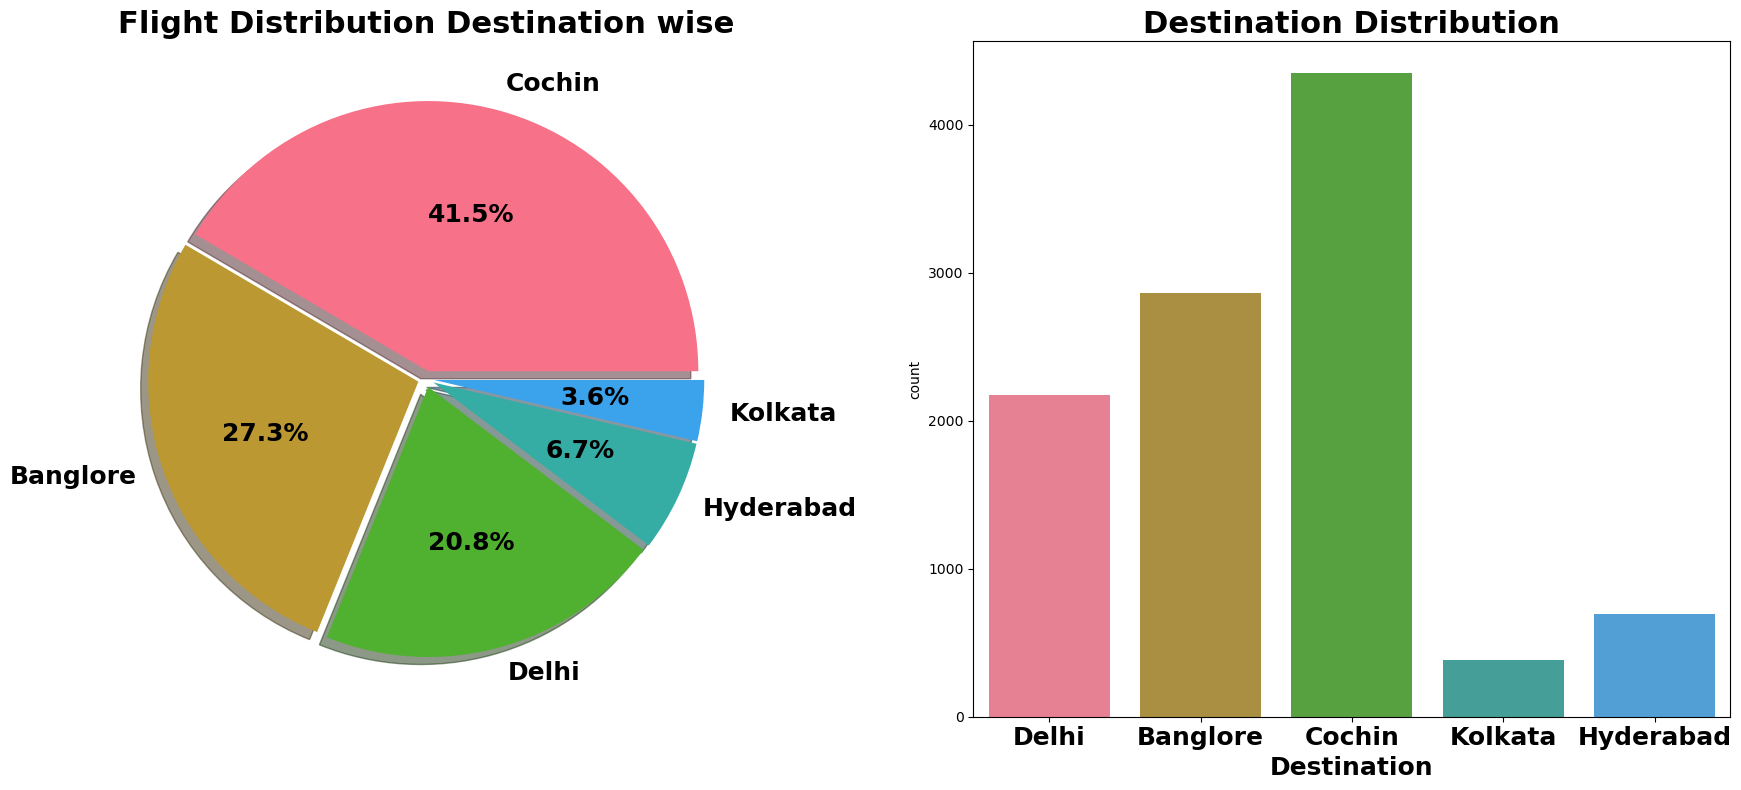

In [26]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Destination'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Flight Distribution Destination wise', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Destination',data=df,ax=ax[1])
ax[1].set_title('Destination Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Destination",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

# Encoding Label Encode

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical:
    df[i] = le.fit_transform(df[i])
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,2,18,170,4,6,3897,24,3,22,20,1,10
1,1,3,0,84,445,1,6,7662,1,5,5,50,13,15
2,4,2,1,118,1140,1,6,13882,9,6,9,25,4,25
3,3,3,0,91,325,0,6,6218,12,5,18,5,23,30
4,3,0,2,29,285,0,6,13302,1,3,16,50,21,35


# 1 - Outliers Detection and Removal

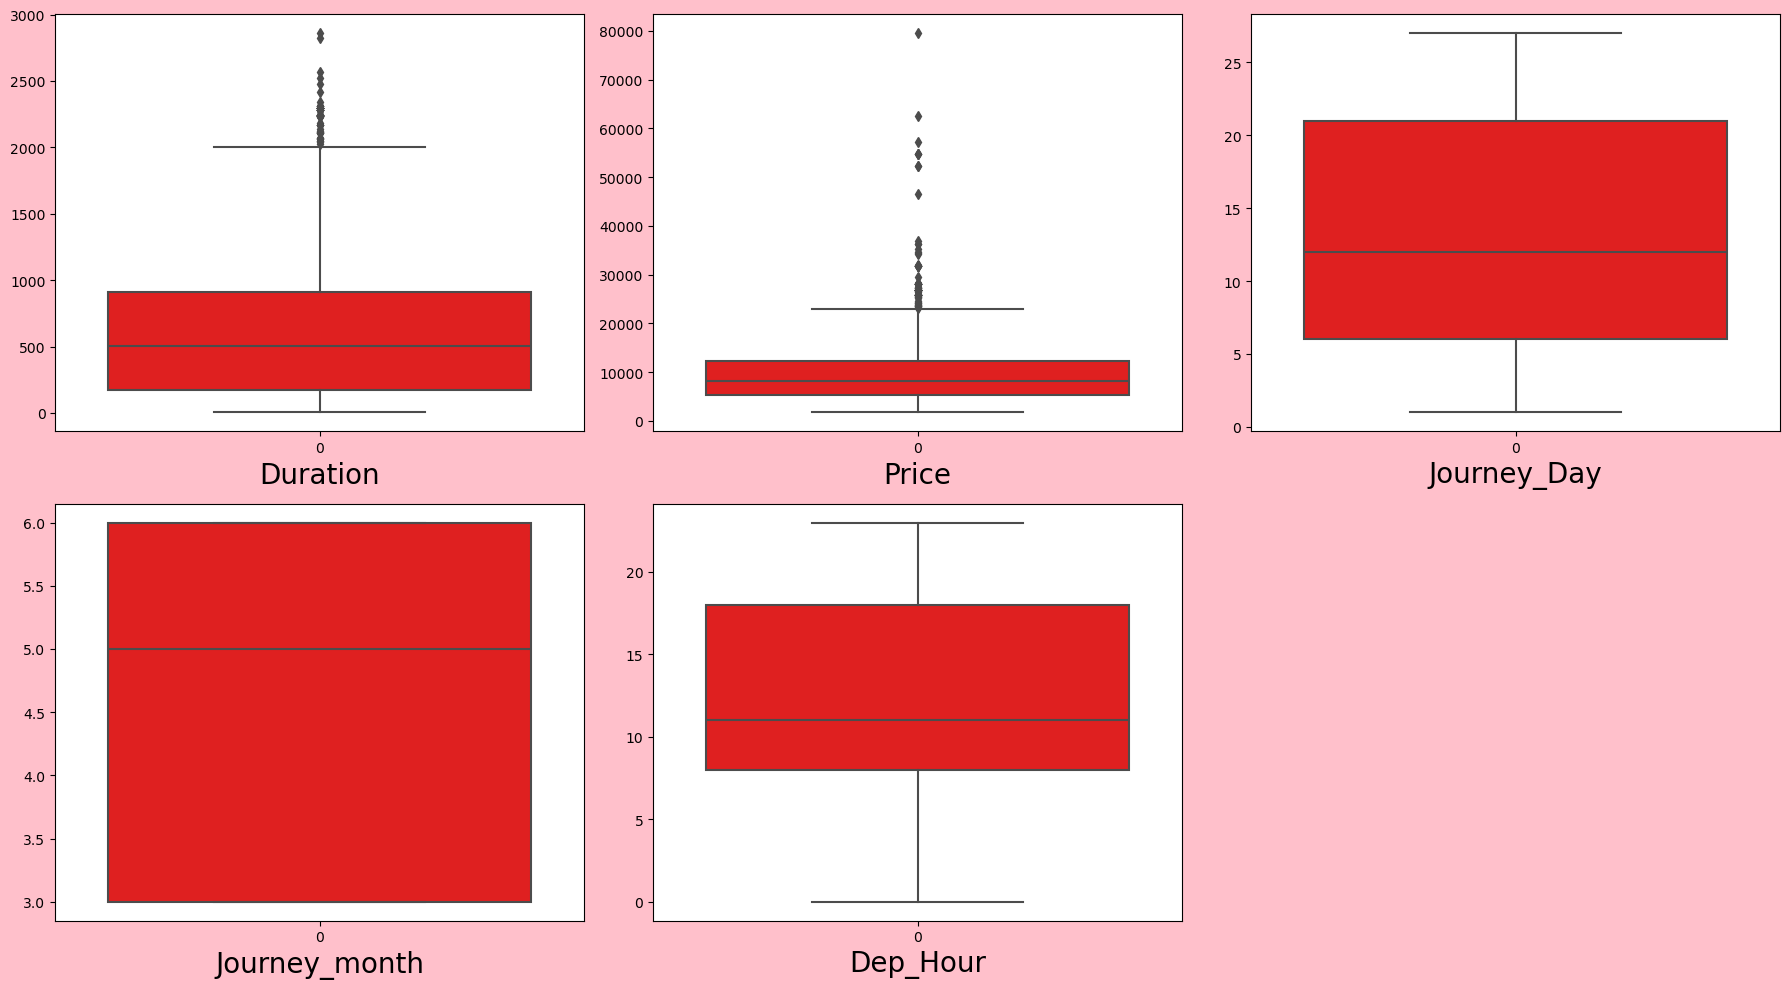

In [28]:
plt.figure(figsize=(18,10),facecolor = 'pink')
plotnumber = 1

for column in Numerical:
    if plotnumber <6:
        ax = plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='red')
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

In [29]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis=1)]

print("Shape of the dataframe before removing outliers:",df.shape)
print("Shape of the dataframe after removing outliers:",df1.shape)
print("Percentage of data loss post outlier removal:",(df.shape[0]-df1.shape[0]) / df.shape[0]*100)
df=df1.copy()

Shape of the dataframe before removing outliers: (10461, 14)
Shape of the dataframe after removing outliers: (10289, 14)
Percentage of data loss post outlier removal: 1.6442022751171015


# 2 - Skewness of Features

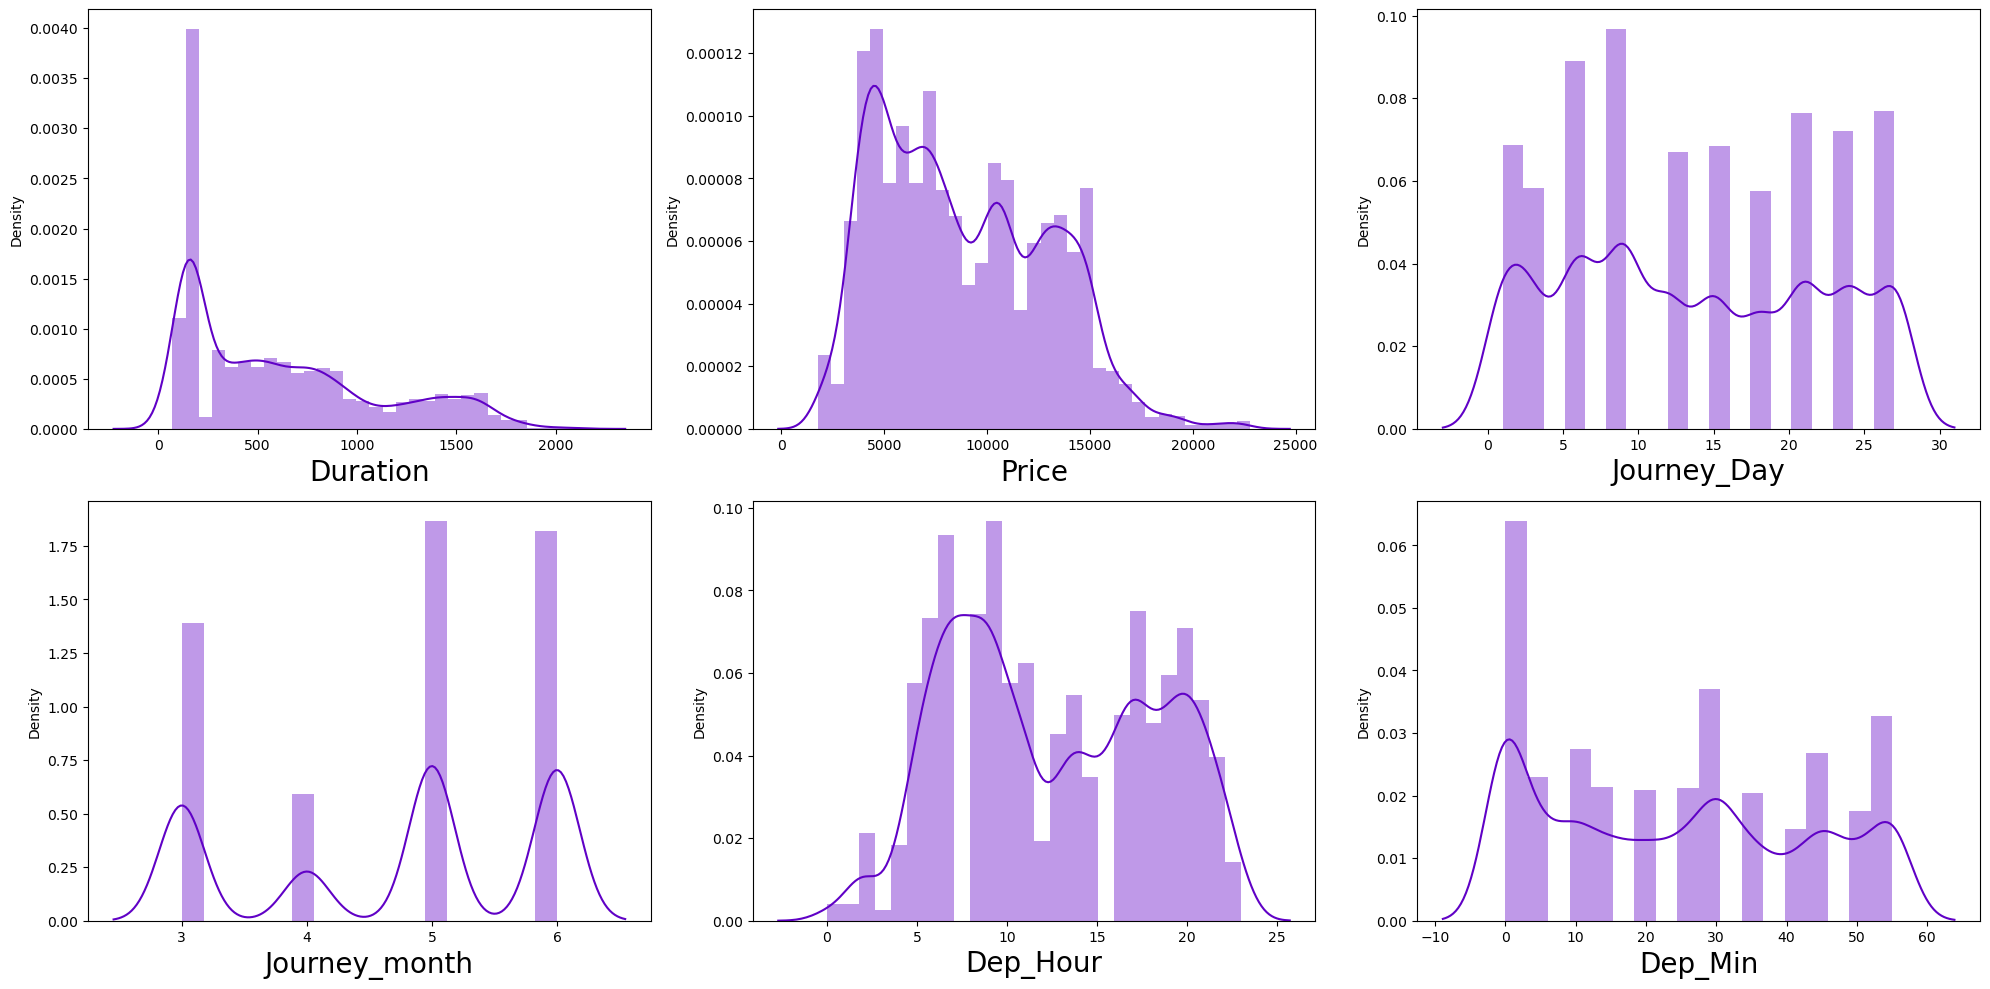

In [30]:
plt.figure(figsize = (20,10) , facecolor = 'white')
sns.set_palette('gnuplot')
plotnum = 1
for col in Numerical:
    if plotnum <=6:
        plt.subplot(2,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [31]:
df.skew()

Airline            0.721810
Source            -0.436014
Destination        0.850689
Route             -0.487883
Duration           0.820318
Total_Stops        0.599846
Additional_Info   -0.726010
Price              0.442553
Journey_Day        0.114526
Journey_month     -0.409366
Dep_Hour           0.099829
Dep_Min            0.176249
Arrival_Hour      -0.371973
Arrival_Min        0.107114
dtype: float64

In [32]:
# Handling skewness 
df['Duration'] = np.log1p(df['Duration'])

In [33]:
# Checking Skewnes after Transformation
df['Duration'].skew()

-0.14885157403409577

# 3 - Correlation

In [34]:
df.corr()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.015504,0.071028,0.029372,-0.115570,0.034367,0.100328,-0.037164,0.024021,0.021337,-0.039750,-0.063211,0.001202,-0.075916
Source,-0.015504,1.000000,-0.430431,0.390544,0.128243,-0.235253,-0.035504,0.077542,-0.013983,0.166917,0.061320,-0.049390,0.028036,0.020829
Destination,0.071028,-0.430431,1.000000,-0.219421,-0.519574,0.517818,0.132394,-0.334660,0.014407,-0.141709,-0.090543,0.094539,-0.062342,0.006426
Route,0.029372,0.390544,-0.219421,1.000000,0.368942,-0.454621,-0.004211,0.245817,0.060945,0.225289,-0.072813,-0.062484,0.020383,-0.179203
Duration,-0.115570,0.128243,-0.519574,0.368942,1.000000,-0.817248,-0.277367,0.672463,-0.023675,0.040005,-0.004032,-0.038597,0.067942,-0.127676
Total_Stops,0.034367,-0.235253,0.517818,-0.454621,-0.817248,1.000000,0.263522,-0.626234,0.021819,-0.032318,0.038382,0.053461,-0.100318,0.178777
Additional_Info,0.100328,-0.035504,0.132394,-0.004211,-0.277367,0.263522,1.000000,-0.155222,-0.013681,-0.054591,-0.063337,0.028095,-0.025678,0.044119
Price,-0.037164,0.077542,-0.334660,0.245817,0.672463,-0.626234,-0.155222,1.000000,-0.119585,-0.052529,0.011200,-0.055109,0.042929,-0.102230
Journey_Day,0.024021,-0.013983,0.014407,0.060945,-0.023675,0.021819,-0.013681,-0.119585,1.000000,-0.060148,-0.005275,0.000618,-0.002766,-0.015018
Journey_month,0.021337,0.166917,-0.141709,0.225289,0.040005,-0.032318,-0.054591,-0.052529,-0.060148,1.000000,0.036719,-0.056214,0.002637,-0.098144


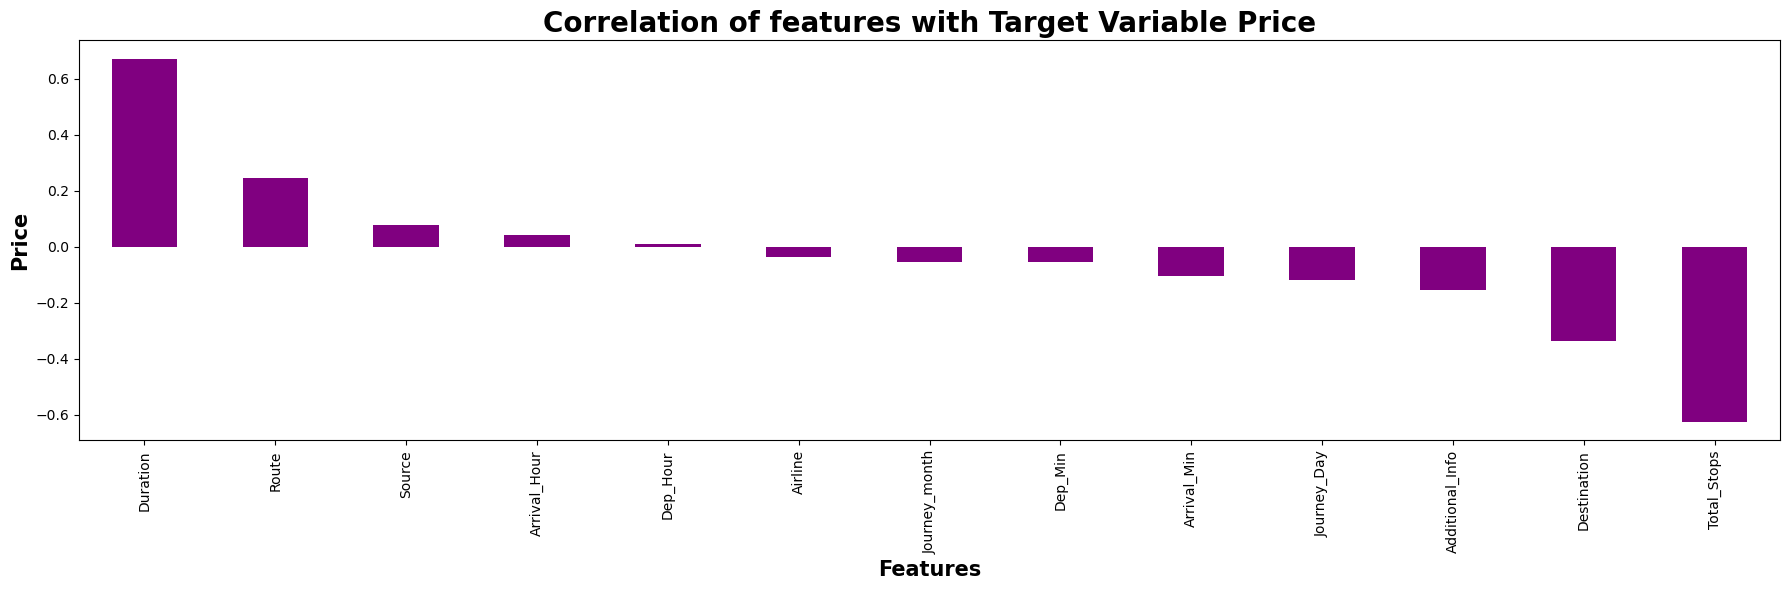

In [35]:
plt.figure(figsize = (18,6))
df.corr()['Price'].drop(['Price']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Price',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Price',fontsize = 20,fontweight='bold')
plt.show()

# Standard Scalling

In [36]:
X = df.drop(['Price'],axis=1)
y = df['Price']

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

### 3 -- Checking Multicollinearity between features using variance_inflation_factor

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif

,VIF Values,Features
0,1.046646,Airline
1,1.507042,Source
2,1.818457,Destination
3,1.621661,Route
4,3.412830,Duration
5,3.606682,Total_Stops
6,1.133749,Additional_Info
7,1.017773,Journey_Day
8,1.115654,Journey_month
9,1.034546,Dep_Hour


# Machine Learning Model Building

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (6893, 13)
Training target vector size: (6893,)
Test feature matrix size: (3396, 13)
Test target vector size: (3396,)


## Finding Best Random State

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, y_train, y_test = train_test_split(X_scale, y , random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.5171899326083136 on Random_state 153


## Linear Regression Base Model

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, random_state=153, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg.score(X_train,y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',y_test)

Predicted Wins:
 [8995.52033609 9236.50071367 8494.76385343 ... 8391.74351326 8796.06609687
 8633.00252774]


Actual Wins:
 2860     10861
10307     3841
552       3739
6032      3597
6628      5192
         ...  
10586     4544
9236      6038
1979      5228
6325      8213
158      10844
Name: Price, Length: 3396, dtype: int64
